In [1]:
# import packages 
import pandas as pd
import numpy as np
import re
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
plt.rcParams["font.family"] = "serif"
from scipy.special import boxcox1p


Skew in numerical features: 



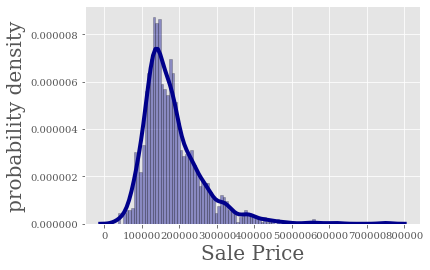

In [2]:
# Read data
dftrain=pd.read_csv('train.csv',header=0, keep_default_na=True,na_values=np.nan)
dftest=pd.read_csv('test.csv',header=0, keep_default_na=True,na_values=np.nan)


# drop IDs
trainID=dftrain.Id
testID=dftest.Id
dftrain.drop('Id',axis=1,inplace=True)
dftest.drop('Id',axis=1,inplace=True)
ntrain = dftrain.shape[0]
ntest = dftest.shape[0]
dftrain1=dftrain.copy()

# plot distribution for sale price
pricedistplot=sns.distplot(dftrain1['SalePrice'], hist=True, kde=True, bins=100, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
pricedistplot.set_ylabel('probability density', fontsize=20)
pricedistplot.set_xlabel('Sale Price', fontsize=20)
plt.savefig('initialpricedistribution.png')

# take log of sale price
dftrain1.SalePrice=np.log1p(dftrain.SalePrice)
dftrain.drop('SalePrice',axis=1,inplace=True)
all_data = pd.concat((dftrain, dftest)).reset_index(drop=True)
all_data.MSSubClass=all_data.MSSubClass.astype('object')
#dftrain.apply(pd.to_numeric,errors='ignore')
stringcolumns=list(all_data.dtypes=='object') # categorical columns
numericcolumns=list(all_data.dtypes!='object') # numerical columns
numericfeatures=list(all_data.loc[:,numericcolumns].columns)


# preplot sale price distrbution

skewed_feats = all_data[numericfeatures].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

corr = dftrain1[['SalePrice'] + numericfeatures].corr()

There are 35 skewed numerical features to Box Cox transform


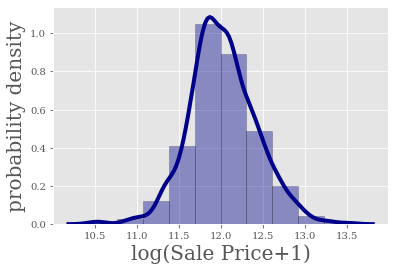

In [3]:

# Plot final distribution for sale price
pricedistplot1=sns.distplot(dftrain1['SalePrice'], hist=True, kde=True, bins=10, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
pricedistplot1.set_ylabel('probability density', fontsize=20)
pricedistplot1.set_xlabel('log(Sale Price+1)', fontsize=20)
plt.savefig('finalpricedistribution.png')


# Impute missing data
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna(0)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

all_data["GarageType"] = all_data["GarageType"].fillna("None")
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop('Utilities', axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data.isnull().sum()

# Box-Cox transform of skewed features with skewness > 0.7 
skewness = skewness[abs(skewness) > 0.7]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p,boxcox
skewed_features = skewness.index
lam = 0.15


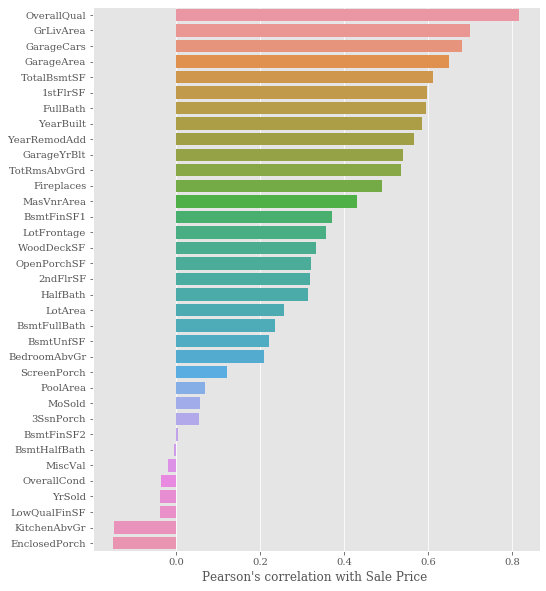

In [4]:
# Plot correlation of each feature to sale price
corr = dftrain1[['SalePrice'] + numericfeatures].corr()
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
corrbarplot=sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
corrbarplot.set_xlabel('Pearson\'s correlation with Sale Price ')
plt.savefig('numericalcorr.png')

In [5]:
# Function for replacing ordinal quality with numbers and dummify 
def HousingPreprocessing(df):


    # for lot shape
    df['LotShape']=df['LotShape'].replace('Reg',1)
    df['LotShape']=df['LotShape'].replace('IR1',2)
    df['LotShape']=df['LotShape'].replace('IR2',3)
    df['LotShape']=df['LotShape'].replace('IR3',4)
    df.sample(10)



    # land slope 
    df.LandSlope.unique()
    df['LandSlope']=df['LandSlope'].replace('Gtl',1)
    df['LandSlope']=df['LandSlope'].replace('Mod',2)
    df['LandSlope']=df['LandSlope'].replace('Sev',3)




    # ExterQual
    df.ExterQual.unique()
    df['ExterQual']=df['ExterQual'].replace('Ex',5)
    df['ExterQual']=df['ExterQual'].replace('Gd',4)
    df['ExterQual']=df['ExterQual'].replace('TA',3)
    df['ExterQual']=df['ExterQual'].replace('Fa',2)
    df['ExterQual']=df['ExterQual'].replace('Po',1)





    # ExterCond
    df.ExterCond.unique()
    df['ExterCond']=df['ExterCond'].replace('Ex',5)
    df['ExterCond']=df['ExterCond'].replace('Gd',4)
    df['ExterCond']=df['ExterCond'].replace('TA',3)
    df['ExterCond']=df['ExterCond'].replace('Fa',2)
    df['ExterCond']=df['ExterCond'].replace('Po',1)




    # BsmtQual
    df.BsmtQual.unique()
    df['BsmtQual']=df['BsmtQual'].replace('Ex',5)
    df['BsmtQual']=df['BsmtQual'].replace('Gd',4)
    df['BsmtQual']=df['BsmtQual'].replace('TA',3)
    df['BsmtQual']=df['BsmtQual'].replace('Fa',2)
    df['BsmtQual']=df['BsmtQual'].replace('Po',1)


 


    # BsmtCond
    #df.BsmtQual.unique()
    df['BsmtCond']=df['BsmtCond'].replace('Ex',5)
    df['BsmtCond']=df['BsmtCond'].replace('Gd',4)
    df['BsmtCond']=df['BsmtCond'].replace('TA',3)
    df['BsmtCond']=df['BsmtCond'].replace('Fa',2)
    df['BsmtCond']=df['BsmtCond'].replace('Po',1)




    # BsmtExposure
    df['BsmtExposure']=df['BsmtExposure'].replace('Gd',4)
    df['BsmtExposure']=df['BsmtExposure'].replace('Av',3)
    df['BsmtExposure']=df['BsmtExposure'].replace('Mn',2)
    df['BsmtExposure']=df['BsmtExposure'].replace('No',1)




    # HeatingQC
    df['HeatingQC']=df['HeatingQC'].replace('Ex',5)
    df['HeatingQC']=df['HeatingQC'].replace('Gd',4)
    df['HeatingQC']=df['HeatingQC'].replace('TA',3)
    df['HeatingQC']=df['HeatingQC'].replace('Fa',2)
    df['HeatingQC']=df['HeatingQC'].replace('Po',1)





    # Central Air
    df['CentralAir']=df['CentralAir'].replace('Y',1)
    df['CentralAir']=df['CentralAir'].replace('N',0)





    # KitchenQual
    df['KitchenQual']=df['KitchenQual'].replace('Ex',5)
    df['KitchenQual']=df['KitchenQual'].replace('Gd',4)
    df['KitchenQual']=df['KitchenQual'].replace('TA',3)
    df['KitchenQual']=df['KitchenQual'].replace('Fa',2)
    df['KitchenQual']=df['KitchenQual'].replace('Po',1)




    # FireplaceQu
    df['FireplaceQu']=df['FireplaceQu'].replace('Ex',5)
    df['FireplaceQu']=df['FireplaceQu'].replace('Gd',4)
    df['FireplaceQu']=df['FireplaceQu'].replace('TA',3)
    df['FireplaceQu']=df['FireplaceQu'].replace('Fa',2)
    df['FireplaceQu']=df['FireplaceQu'].replace('Po',1)




    # GarageFinish
    df['GarageFinish']=df['GarageFinish'].replace('Fin',3)
    df['GarageFinish']=df['GarageFinish'].replace('RFn',2)
    df['GarageFinish']=df['GarageFinish'].replace('Unf',1)


    


    # GarageQual
    df['GarageQual']=df['GarageQual'].replace('Ex',5)
    df['GarageQual']=df['GarageQual'].replace('Gd',4)
    df['GarageQual']=df['GarageQual'].replace('TA',3)
    df['GarageQual']=df['GarageQual'].replace('Fa',2)
    df['GarageQual']=df['GarageQual'].replace('Po',1)


    


    # GarageCond
    df['GarageCond']=df['GarageCond'].replace('Ex',5)
    df['GarageCond']=df['GarageCond'].replace('Gd',4)
    df['GarageCond']=df['GarageCond'].replace('TA',3)
    df['GarageCond']=df['GarageCond'].replace('Fa',2)
    df['GarageCond']=df['GarageCond'].replace('Po',1)


    


    # PavedDrive
    df['PavedDrive']=df['PavedDrive'].replace('Y',3)
    df['PavedDrive']=df['PavedDrive'].replace('P',2)
    df['PavedDrive']=df['PavedDrive'].replace('N',1)


    


    # PoolQC
    df['PoolQC']=df['PoolQC'].replace('Ex',5)
    df['PoolQC']=df['PoolQC'].replace('Gd',4)
    df['PoolQC']=df['PoolQC'].replace('TA',3)
    df['PoolQC']=df['PoolQC'].replace('Fa',2)
    df['PoolQC']=df['PoolQC'].replace('Po',1)


    
    return pd.get_dummies(df,drop_first=True)

In [6]:
df=HousingPreprocessing(all_data)

df.isnull().sum().sum()

0

In [7]:
# obtain new train and test set 
y=dftrain1['SalePrice']
train = df.iloc[:ntrain,:]
test = df.iloc[ntrain:,:]
test

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,80.0,11622,1,1,5,6,1961,1961,0.0,...,0,0,0,0,1,0,0,0,1,0
1461,20,81.0,14267,2,1,6,6,1958,1958,108.0,...,0,0,0,0,1,0,0,0,1,0
1462,60,74.0,13830,2,1,5,5,1997,1998,0.0,...,0,0,0,0,1,0,0,0,1,0
1463,60,78.0,9978,2,1,6,6,1998,1998,20.0,...,0,0,0,0,1,0,0,0,1,0
1464,120,43.0,5005,2,1,8,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,1,1,4,7,1970,1970,0.0,...,0,0,0,0,1,0,0,0,1,0
2915,160,21.0,1894,1,1,4,5,1970,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
2916,20,160.0,20000,1,1,5,7,1960,1996,0.0,...,0,0,0,0,1,0,0,0,0,0
2917,85,62.0,10441,1,1,5,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler=RobustScaler()
dfscaled=scaler.fit_transform(train)

In [9]:
n_folds = 5

# function to do cross validation scoring 
def rmsle_cv(model,df,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df)
    rmse= np.sqrt(-cross_val_score(model, df, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)




In [10]:
# cross validation score for Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
ols = Lasso()
ols.set_params(alpha = 0.00081515,normalize=False)
np.mean(rmsle_cv(ols,dfscaled,y))

0.1392954714946937

In [11]:
# The result of a random split
X_train, X_test, y_train, y_test = train_test_split(dfscaled, y, test_size=1/5, random_state=41)


In [12]:
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))


R^2 for train set: 0.907224
--------------------------------------------------
R^2 for test  set: 0.898841


<Figure size 864x432 with 0 Axes>

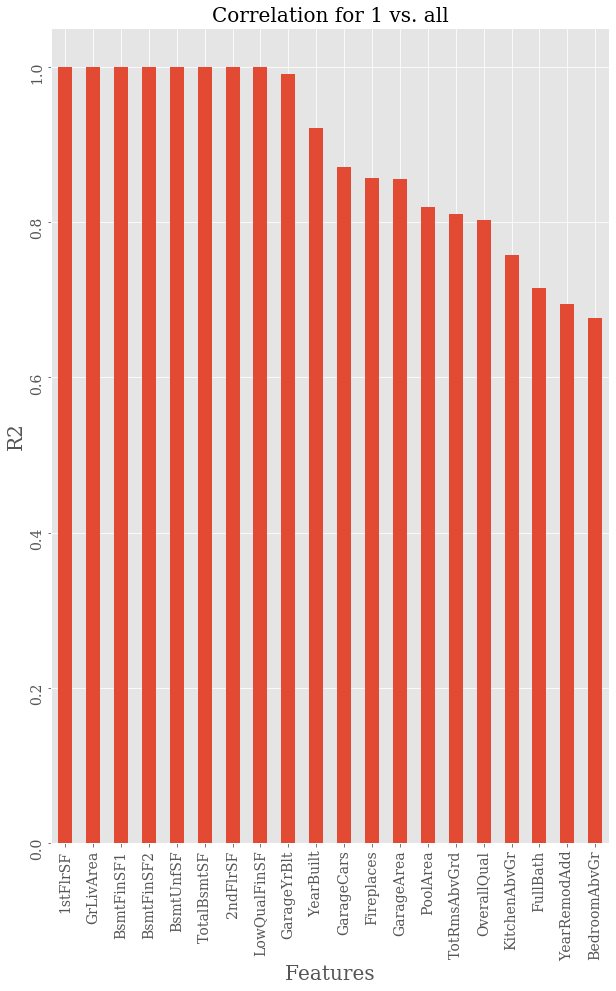

In [13]:
# visualize colinearity

scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in numericfeatures:
                df1     = df.copy()
                feature = df1[[feature_name]].copy()
                df1.drop(feature_name, axis=1, inplace=True)
                df1_scaled=scaler.fit_transform(df1)
                feature_scaled=scaler.fit_transform(feature)
                ols2.fit(df1_scaled, feature_scaled)
                scores[feature_name] = ols2.score(df1_scaled, feature_scaled)   
import seaborn as sns
topscores=pd.DataFrame(scores, index=['R2']).T.reset_index().sort_values(by='R2',axis=0,ascending=False).iloc[0:20,:]
plt.figure(figsize=(12,6))

Rbar=topscores.plot.bar(x='index',y='R2',figsize=(10,15),legend=False)
Rbar.set_title('Correlation for 1 vs. all',fontsize=20)
Rbar.set_ylabel('R2',fontsize=20)
Rbar.set_xlabel('Features',fontsize=20)
for tick in Rbar.get_xticklabels():
    tick.set_fontsize(14)
for tick in Rbar.get_yticklabels():
    tick.set_fontsize(14)
plt.yticks(rotation=90)
plt.savefig('Rbar.png')

In [14]:
# Eliminate correlated variables to reduce overfitting
df2=train.drop(['TotalBsmtSF','GrLivArea','GarageArea'],1)
dfscaled = scaler.fit_transform(df2)
X_train, X_test, y_train, y_test = train_test_split(dfscaled, y, test_size=1/5, random_state=41)
#ols = Lasso()
#ols.set_params(alpha =0.0008151515,normalize=False)
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))
np.mean(rmsle_cv(ols,dfscaled,y))

R^2 for train set: 0.907086
--------------------------------------------------
R^2 for test  set: 0.898934


0.1383568885835773

In [15]:
# score for x_test within the training set
from sklearn.metrics import mean_squared_error
predictions=ols.predict(X_test)
np.sqrt(mean_squared_error( y_test, predictions ))

0.12050954536667802

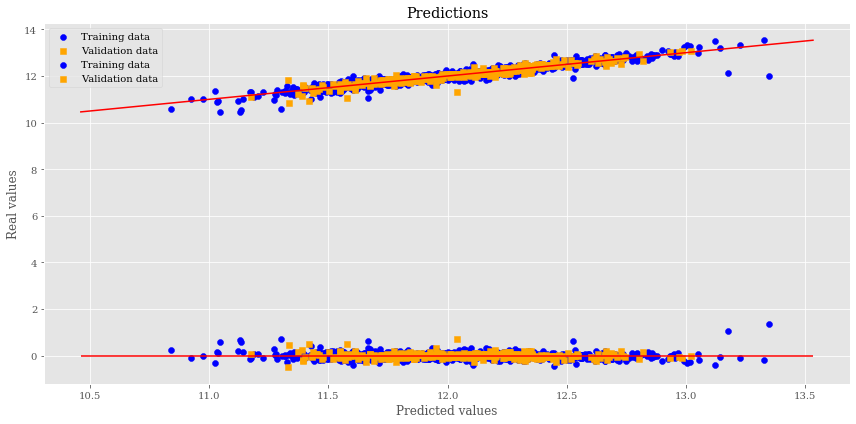

<Figure size 432x288 with 0 Axes>

In [16]:
# plot residuals and predicted vs. actual values
y_train_preds = ols.predict(X_train)
y_test_preds = ols.predict(X_test)
    
plt.figure(figsize=(12,6))
    # Residuals

plt.scatter(y_train_preds, y_train_preds - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds, y_test_preds - y_test, c='orange', marker='s', label='Validation data')
plt.title('Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max(), color='red')
plt.savefig('Residualsevaluation.png')
    # Predictions

plt.scatter(y_train_preds, y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds, y_test, c='orange', marker='s', label='Validation data')
plt.title('Predictions')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.legend(loc='upper left')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='red')
plt.tight_layout()
plt.show()


plt.savefig('Predictionsevaluation.png')

In [17]:
# Tuning alpha using grid search
from sklearn.model_selection import GridSearchCV
grid_values = {'alpha': np.linspace(0.0008,0.0009,100)}
grid_clf_acc = GridSearchCV(ols, param_grid = grid_values,cv=5)
grid_clf_acc.fit(dfscaled,y)
print("\n The best parameters across ALL searched params:\n",grid_clf_acc.best_params_)


 The best parameters across ALL searched params:
 {'alpha': 0.0008151515151515152}


In [18]:
# process Kaggle test set
dftest=test.drop(['TotalBsmtSF','GrLivArea','GarageArea'],1)
dftestscaled = scaler.fit_transform(dftest)
result_ols=ols.predict(dftestscaled)
result_ols=np.exp(result_ols)-1

In [19]:
resultdic= {'Id': testID, 'SalePrice': list(result_ols)}
TestResult=pd.DataFrame(data=resultdic)


In [20]:
# output kaggle test result
TestResult
TestResult.to_csv(r'TestResult.csv', index = False)